# Data Exploration

In this step, the data is analyzed and visualized to gain a better understanding of the patterns and trends it contains. This may involve creating graphs, plots, and charts to visualize the data, and using statistical techniques to identify relationships and correlations.

## Setup Environment

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import pickle

## Import Data

In [156]:
## Import Data

# Warning: Run the data_exploration.ipynb to generate the explored_spotify_data.csv
df = pd.read_csv('../data/prepared_spotify_data.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head(4)

,disc_number,duration_ms,explicit,track_id,is_local,track_name,popularity,track_number,track_type,artist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_type,time_signature
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,False,Rich Flex,96,1,track,3TVXtAsR1Inumwj472S9r4,...,-9.342,0,0.244,0.050300,0.000002,0.355,0.424,153.150,audio_features,3
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,False,God's Plan,85,5,track,3TVXtAsR1Inumwj472S9r4,...,-9.211,1,0.109,0.033200,0.000083,0.552,0.357,77.169,audio_features,4
2,1,160821,True,7l2nxyx7IkBX5orhkALg0V,False,Privileged Rappers,83,5,track,3TVXtAsR1Inumwj472S9r4,...,-7.384,1,0.198,0.002740,0.000000,0.123,0.616,144.045,audio_features,4
3,1,218364,True,3F5CgOj3wFlRv51JsHbxhe,False,Jimmy Cooks (feat. 21 Savage),90,14,track,3TVXtAsR1Inumwj472S9r4,...,-4.711,1,0.175,0.000307,0.000002,0.093,0.366,165.921,audio_features,4


## Check constants columns

During the data exploration, we didn't analyze the behaviour of data. If we want to have a consistent and high quality dataset, we need to remove every attribute with no information inside. In other words, we should delete columns without any variation of data or with single-element domain.

In [157]:
for col in df.columns:
    if len(df[col].value_counts()) == 1:
        print(f'{col} => {df[col][0]}')

is_local => False
track_type => track
artist_type => artist
album_type.1 => album
features_type => audio_features


In [158]:
# values inside the previous column determinate the nature of the subset of data inside the merged dataset. 
# They aren't actually useful, so, we can delete them.
df = df.drop(columns=['is_local', 'track_type', 'artist_type', 'album_type.1', 'album_type', 'features_type'])
df.head(5)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_id,artist_name,album_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,3TVXtAsR1Inumwj472S9r4,Drake,5MS3MvWHJ3lOZPLiMxzOU6,...,11,-9.342,0,0.244,0.050300,0.000002,0.3550,0.424,153.150,3
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,3TVXtAsR1Inumwj472S9r4,Drake,1ATL5GLyefJaxhQzSPVrLX,...,7,-9.211,1,0.109,0.033200,0.000083,0.5520,0.357,77.169,4
2,1,160821,True,7l2nxyx7IkBX5orhkALg0V,Privileged Rappers,83,5,3TVXtAsR1Inumwj472S9r4,Drake,5MS3MvWHJ3lOZPLiMxzOU6,...,5,-7.384,1,0.198,0.002740,0.000000,0.1230,0.616,144.045,4
3,1,218364,True,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),90,14,3TVXtAsR1Inumwj472S9r4,Drake,3cf4iSSKd8ffTncbtKljXw,...,0,-4.711,1,0.175,0.000307,0.000002,0.0930,0.366,165.921,4
4,1,189893,True,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),88,7,3TVXtAsR1Inumwj472S9r4,Drake,6tE9Dnp2zInFij4jKssysL,...,1,-4.474,1,0.340,0.314000,0.000000,0.0686,0.339,83.389,4


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39863 entries, 0 to 39862
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   disc_number             39863 non-null  int64  
 1   duration_ms             39863 non-null  int64  
 2   explicit                39863 non-null  bool   
 3   track_id                39863 non-null  object 
 4   track_name              39863 non-null  object 
 5   popularity              39863 non-null  int64  
 6   track_number            39863 non-null  int64  
 7   artist_id               39863 non-null  object 
 8   artist_name             39863 non-null  object 
 9   album_id                39863 non-null  object 
 10  album_name              39863 non-null  object 
 11  release_date            39863 non-null  object 
 12  release_date_precision  39863 non-null  object 
 13  total_tracks            39863 non-null  int64  
 14  danceability            39863 non-null

## Remove subset id attributes

In [160]:
# the references of single subset of data such as artists, album and features id are useless in the merged dataset
df = df.drop(columns=['artist_id', 'album_id'], axis=1)
df.head(5)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.050300,0.000002,0.3550,0.424,153.150,3
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.033200,0.000083,0.5520,0.357,77.169,4
2,1,160821,True,7l2nxyx7IkBX5orhkALg0V,Privileged Rappers,83,5,Drake,Her Loss,2022-11-04,...,5,-7.384,1,0.198,0.002740,0.000000,0.1230,0.616,144.045,4
3,1,218364,True,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),90,14,Drake,"Honestly, Nevermind",2022-06-17,...,0,-4.711,1,0.175,0.000307,0.000002,0.0930,0.366,165.921,4
4,1,189893,True,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),88,7,Drake,I NEVER LIKED YOU,2022-04-29,...,1,-4.474,1,0.340,0.314000,0.000000,0.0686,0.339,83.389,4


## Changing boolean variables in integer

In [161]:
# the only boolean variable is explicit
df.explicit = df.explicit.astype(int)
df.head(2)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,1,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.0503,0.000002,0.355,0.424,153.150,3
1,1,198973,1,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.0332,0.000083,0.552,0.357,77.169,4


## Export result dataset

In [162]:
df.to_csv('../data/cleaned_spotify_data.csv')

## Spotify Exploration

In [163]:
df.head(5)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,1,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.050300,0.000002,0.3550,0.424,153.150,3
1,1,198973,1,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.033200,0.000083,0.5520,0.357,77.169,4
2,1,160821,1,7l2nxyx7IkBX5orhkALg0V,Privileged Rappers,83,5,Drake,Her Loss,2022-11-04,...,5,-7.384,1,0.198,0.002740,0.000000,0.1230,0.616,144.045,4
3,1,218364,1,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),90,14,Drake,"Honestly, Nevermind",2022-06-17,...,0,-4.711,1,0.175,0.000307,0.000002,0.0930,0.366,165.921,4
4,1,189893,1,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),88,7,Drake,I NEVER LIKED YOU,2022-04-29,...,1,-4.474,1,0.340,0.314000,0.000000,0.0686,0.339,83.389,4


In [164]:
# find if there is null elements in each column
pd.isnull(df).sum()

disc_number               0
duration_ms               0
explicit                  0
track_id                  0
track_name                0
popularity                0
track_number              0
artist_name               0
album_name                0
release_date              0
release_date_precision    0
total_tracks              0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

We don't have null values, so the exploration mantains consistent over distributions.

In [165]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disc_number,39863.0,1.020144,0.200272,1.0,1.0000,1.000000,1.00000,11.000
duration_ms,39863.0,216504.147104,70484.993052,19181.0,179066.0000,208306.000000,242506.00000,4643866.000
explicit,39863.0,0.250282,0.433181,0.0,0.0000,0.000000,1.00000,1.000
popularity,39863.0,53.554349,17.072315,0.0,46.0000,56.000000,64.00000,100.000
track_number,39863.0,5.920453,6.869679,1.0,1.0000,4.000000,8.00000,262.000
total_tracks,39863.0,13.791411,13.088163,1.0,7.0000,13.000000,17.00000,378.000
danceability,39863.0,0.620897,0.159637,0.0,0.5190,0.635000,0.73900,0.981
energy,39863.0,0.646868,0.203528,0.0,0.5200,0.674000,0.80400,0.999
key,39863.0,5.269774,3.604601,0.0,2.0000,5.000000,8.00000,11.000
loudness,39863.0,-6.998121,3.585259,-60.0,-8.2215,-6.238000,-4.77600,0.642


In [166]:
from datetime import datetime

# convert object in string
df.release_date = df.release_date.astype(str)

def extract_year(value):
    if value[:4] == '2022':
        return value
    else:
        return None

df_2022 = df.copy(deep=True)
df_2022.release_date = df_2022.release_date.apply(extract_year)
df_2022.dropna(subset=['release_date'], inplace=True)

print('Popular Tracks in 2022:')
df_2022.sort_values(by=['popularity'], ascending=False)[['track_name', 'artist_name', 'popularity', 'release_date', 'loudness', 'danceability', 'liveness', 'valence', 'tempo', 'instrumentalness', 'energy']].head(10)

Popular Tracks in 2022:


,track_name,artist_name,popularity,release_date,loudness,danceability,liveness,valence,tempo,instrumentalness,energy
1306,Unholy (feat. Kim Petras),Sam Smith,100,2022-09-22,-7.375,0.714,0.2660,0.238,131.121,0.000005,0.472
1072,I'm Good (Blue),David Guetta,98,2022-08-26,-3.673,0.561,0.3710,0.304,128.040,0.000007,0.965
7988,La Bachata,Manuel Turizo,98,2022-05-26,-5.329,0.835,0.2180,0.850,124.980,0.000002,0.679
11864,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,97,2022-07-06,-5.548,0.621,0.2300,0.550,128.033,0.033000,0.782
196,Anti-Hero,Taylor Swift,97,2022-10-21,-6.571,0.637,0.1420,0.533,97.008,0.000002,0.643
0,Rich Flex,Drake,96,2022-11-04,-9.342,0.561,0.3550,0.424,153.150,0.000002,0.520
147,Creepin' (with The Weeknd & 21 Savage),The Weeknd,96,2022-12-02,-6.005,0.715,0.0822,0.172,97.950,0.000000,0.620
5425,Kill Bill,SZA,96,2022-12-09,-5.750,0.644,0.1610,0.430,88.993,0.169000,0.728
51,Me Porto Bonito,Bad Bunny,96,2022-05-06,-5.105,0.911,0.0933,0.425,92.005,0.000027,0.712
50,Tití Me Preguntó,Bad Bunny,95,2022-05-06,-5.198,0.650,0.1260,0.187,106.672,0.000291,0.715


In [167]:
# define the same table for the overall tracks
df.sort_values(by=['popularity'], ascending=False)[['track_name', 'artist_name', 'popularity', 'release_date', 'loudness', 'danceability', 'liveness', 'valence', 'tempo', 'instrumentalness', 'energy']].head(10)

,track_name,artist_name,popularity,release_date,loudness,danceability,liveness,valence,tempo,instrumentalness,energy
1306,Unholy (feat. Kim Petras),Sam Smith,100,2022-09-22,-7.375,0.714,0.2660,0.238,131.121,0.000005,0.472
7509,All I Want for Christmas Is You,Mariah Carey,99,1994-10-28,-7.463,0.336,0.0708,0.350,150.273,0.000000,0.627
1072,I'm Good (Blue),David Guetta,98,2022-08-26,-3.673,0.561,0.3710,0.304,128.040,0.000007,0.965
7988,La Bachata,Manuel Turizo,98,2022-05-26,-5.329,0.835,0.2180,0.850,124.980,0.000002,0.679
196,Anti-Hero,Taylor Swift,97,2022-10-21,-6.571,0.637,0.1420,0.533,97.008,0.000002,0.643
11864,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,97,2022-07-06,-5.548,0.621,0.2300,0.550,128.033,0.033000,0.782
0,Rich Flex,Drake,96,2022-11-04,-9.342,0.561,0.3550,0.424,153.150,0.000002,0.520
5425,Kill Bill,SZA,96,2022-12-09,-5.750,0.644,0.1610,0.430,88.993,0.169000,0.728
51,Me Porto Bonito,Bad Bunny,96,2022-05-06,-5.105,0.911,0.0933,0.425,92.005,0.000027,0.712
28884,Last Christmas,Wham!,96,1984-11-29,-12.472,0.735,0.3550,0.947,107.682,0.000002,0.478


Data retrieval done near 25 of December. So, the second in the classify is obvious.

In [168]:
# convert the duration metrics in minutes for a better exploration
df['duration_ms'] =  df.duration_ms.apply(lambda x: round(x / 60000, 2))
df['duration_min'] = df.duration_ms
df = df.drop(columns='duration_ms')
df.duration_min[:2]

0    3.99
1    3.32
Name: duration_min, dtype: float64

In [169]:
df['duration_min'].describe()

count    39863.000000
mean         3.608408
std          1.174751
min          0.320000
25%          2.980000
50%          3.470000
75%          4.040000
max         77.400000
Name: duration_min, dtype: float64

In [170]:
# exist a song with 77 minutes of listening
df[df['duration_min'].max() == df['duration_min']]

,disc_number,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,release_date_precision,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
22736,1,0,2uNWjdFjRiP0srmf3AktwS,Late Night Tales: Mgmt - Continuous Mix,19,13,MGMT,Late Night Tales: Mgmt,2002,year,...,-13.145,1,0.0517,0.154,0.0323,0.186,0.136,109.898,4,77.4


### Release Date exploration

In [171]:
# check if the data format is the same for the exploration robustness
df[df.release_date.astype(str).str.match(r'^\d{4}-\d{2}-\d{2}$') == False].head(5)

,disc_number,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,release_date_precision,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
1032,1,0,7LcfRTgAVTs5pQGEQgUEzN,"Moves Like Jagger - Studio Recording From ""The...",72,13,Maroon 5,Hands All Over,2010,year,...,-4.477,0,0.0471,0.011100,0.0,0.3080,0.620,128.047,4,3.35
1035,1,0,6ECp64rv50XVz93WvxXMGF,This Love,80,2,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,year,...,-4.612,0,0.0378,0.052500,0.0,0.0930,0.809,95.051,4,3.44
1036,1,0,4llK75pXNWZz6KAho2Gp16,She Will Be Loved - Radio Mix,79,4,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,year,...,-5.569,0,0.0281,0.228000,0.0,0.0994,0.465,102.000,4,4.32
1037,1,0,6KBYk8OFtod7brGuZ3Y67q,Misery,64,1,Maroon 5,Hands All Over (Deluxe),2010,year,...,-4.874,0,0.0425,0.000315,0.0,0.2160,0.726,102.980,4,3.60
1038,1,0,5qII2n90lVdPDcgXEEVHNy,Sunday Morning,76,8,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,year,...,-5.227,1,0.0475,0.091300,0.0,0.0629,0.809,88.059,4,4.08


There are some observations with only the year, meanwhile there are others with the full date format (YYYY-MM-DD). Due to the scope of work, we can divide and analyze songs per years. So, we can put the release_date in release_year format.

In [172]:


df['release_year'] = df.release_date.apply(lambda x: x[:4])
# assert the correct matching for every element of the column
assert df.release_year.str.match(r'^\d{4}$').all(), 'Some years are not matched.'

# drop the column
df = df.drop(columns=['release_date', 'release_date_precision'])



<AxesSubplot: ylabel='release_year'>

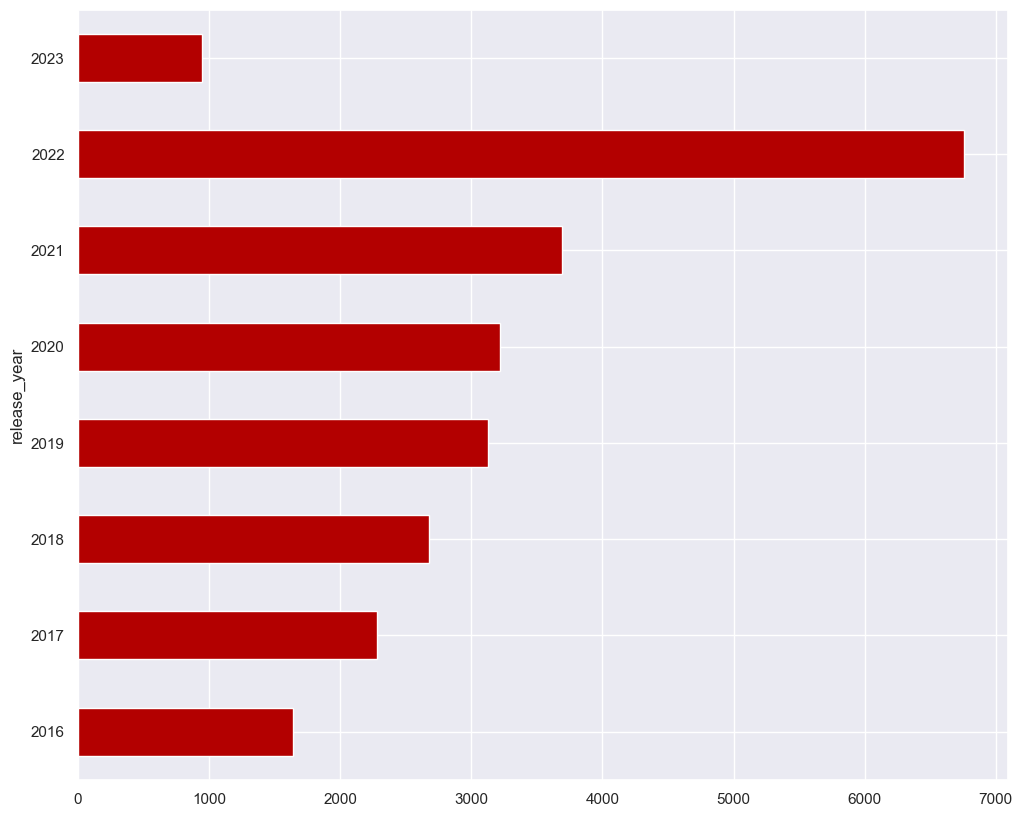

In [173]:
# count the number of tracks per year
count = df.groupby('release_year').size().values
c = df.copy(deep=True)

# group the release_dat eand count name 
c = df.groupby('release_year').size().rename('count')

# display them in a graph
c[c.index.astype(int) > 2015].plot.barh(stacked=True, color="#b30000")

In [174]:
# check the 
print('Max size year:\n', '-'*12, '\n', c[c.values == c.max()])
print('Min size year:\n','-'*12, '\n', c[c.values == c.min()] )

Max size year:
 ------------ 
 release_year
2022    6755
Name: count, dtype: int64
Min size year:
 ------------ 
 release_year
1928    1
1950    1
Name: count, dtype: int64


### Features Exploration

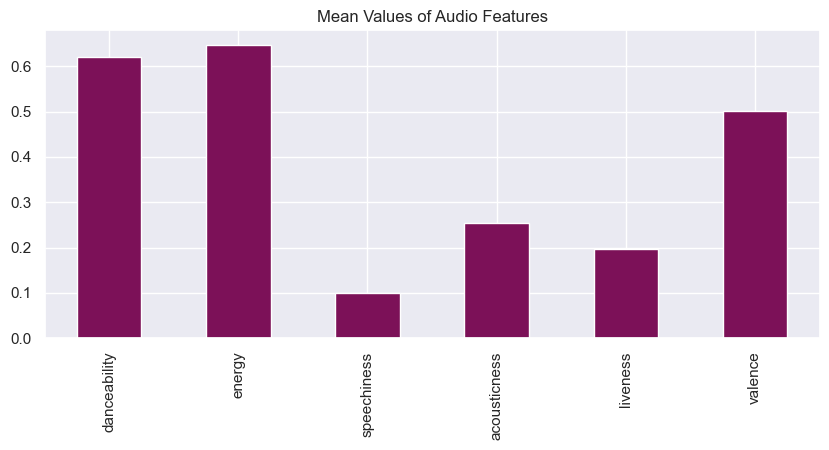

In [179]:
feats = df[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
feats.mean().plot.bar(color="#7c1158")
plt.title('Mean Values of Audio Features')
plt.show()


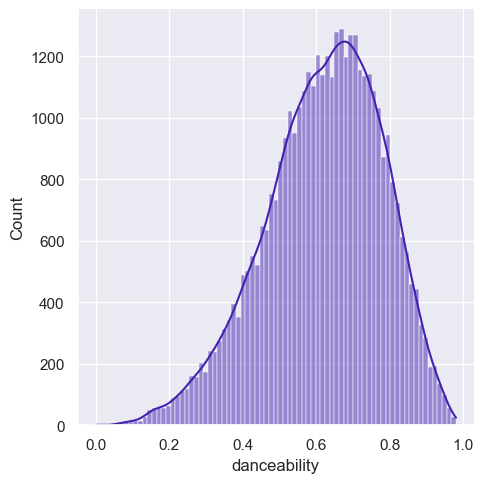

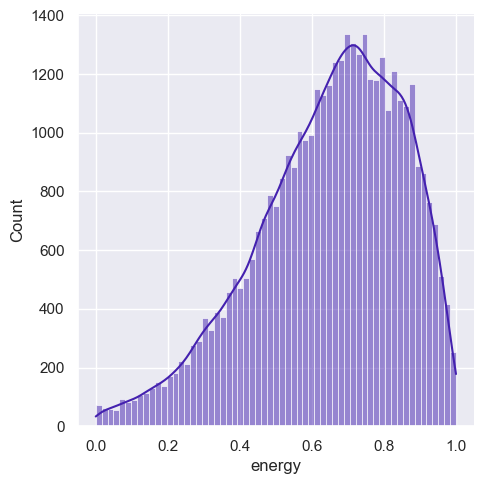

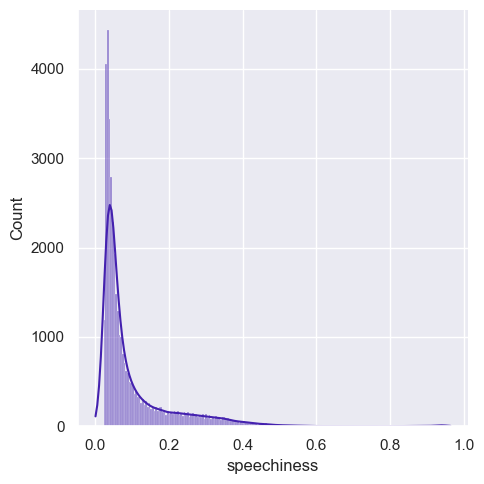

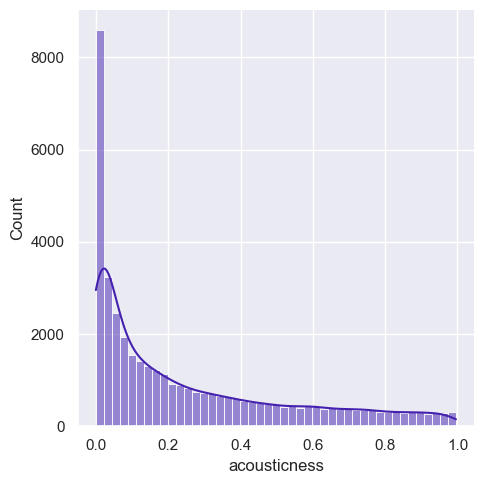

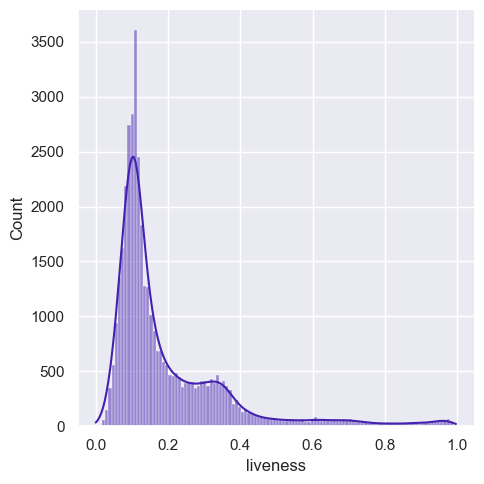

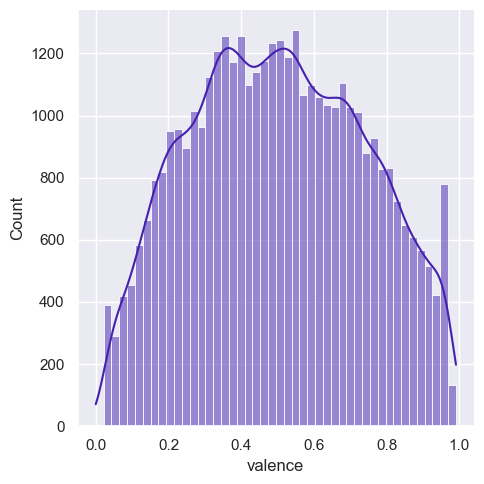

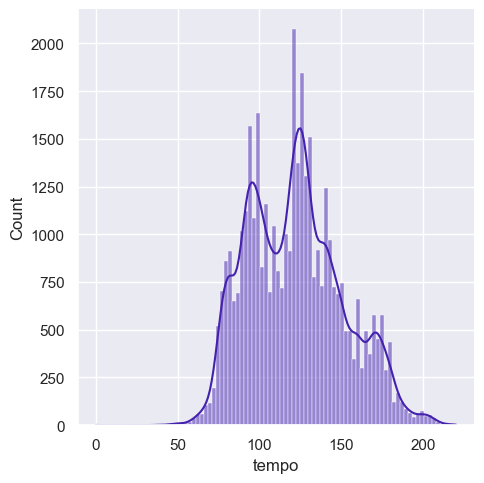

In [185]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
# plotting histogram for each feature
for col in features:
  sns.displot(df, x=col, kde=True, color="#4421af")

plt.show()

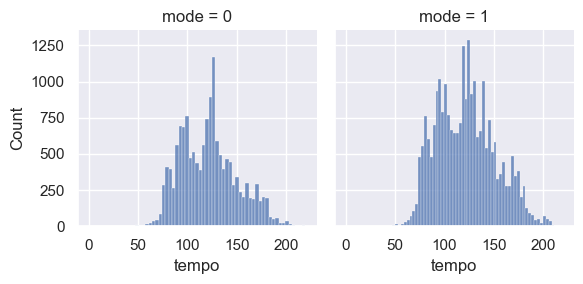

In [186]:
# division between the major and minor mode on track tempo
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(df, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

<AxesSubplot: xlabel='key', ylabel='count'>

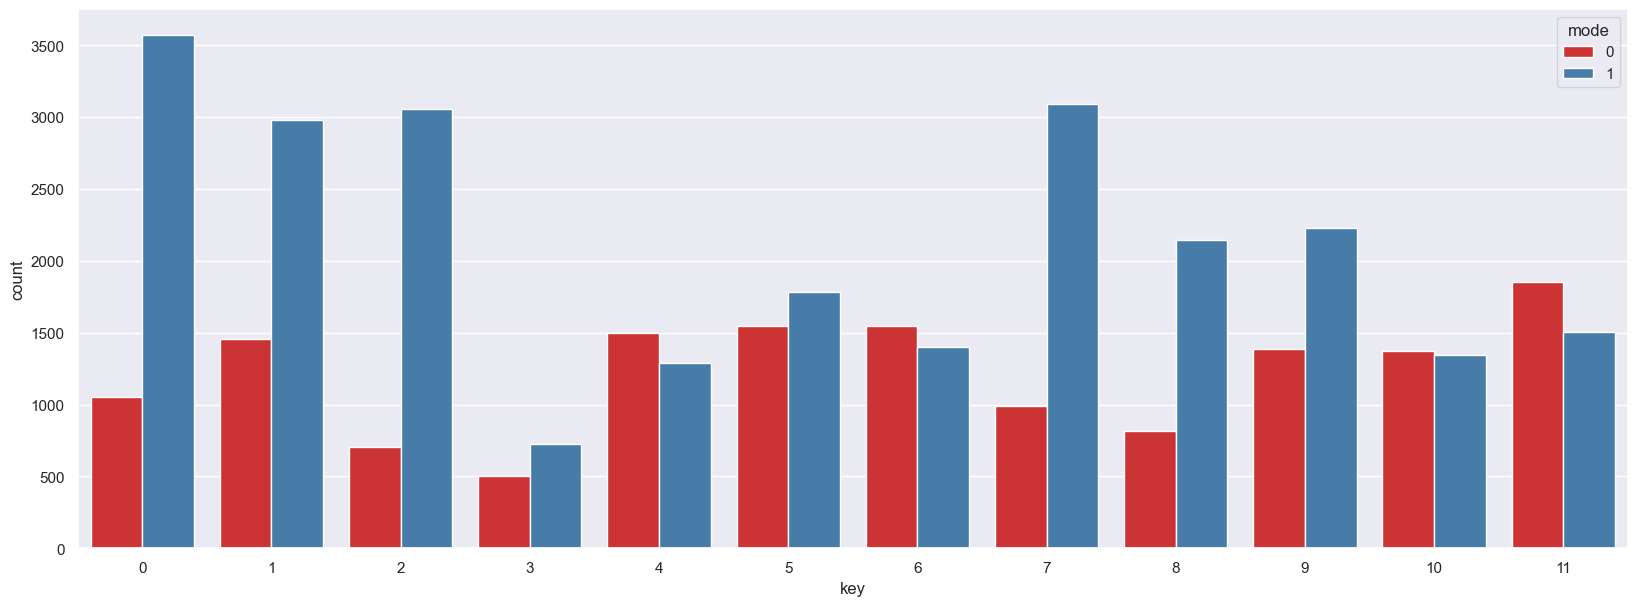

In [190]:
# count tracks for each key and mode couple (12 keys availables in music)
sns.countplot(data=df, x='key', hue='mode', palette = 'Set1')


### Correlations

/var/folders/jd/ysm594m928dfp92zgrlsp1vr0000gn/T/ipykernel_20047/3892167979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
/var/folders/jd/ysm594m928dfp92zgrlsp1vr0000gn/T/ipykernel_20047/3892167979.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5,


<AxesSubplot: >

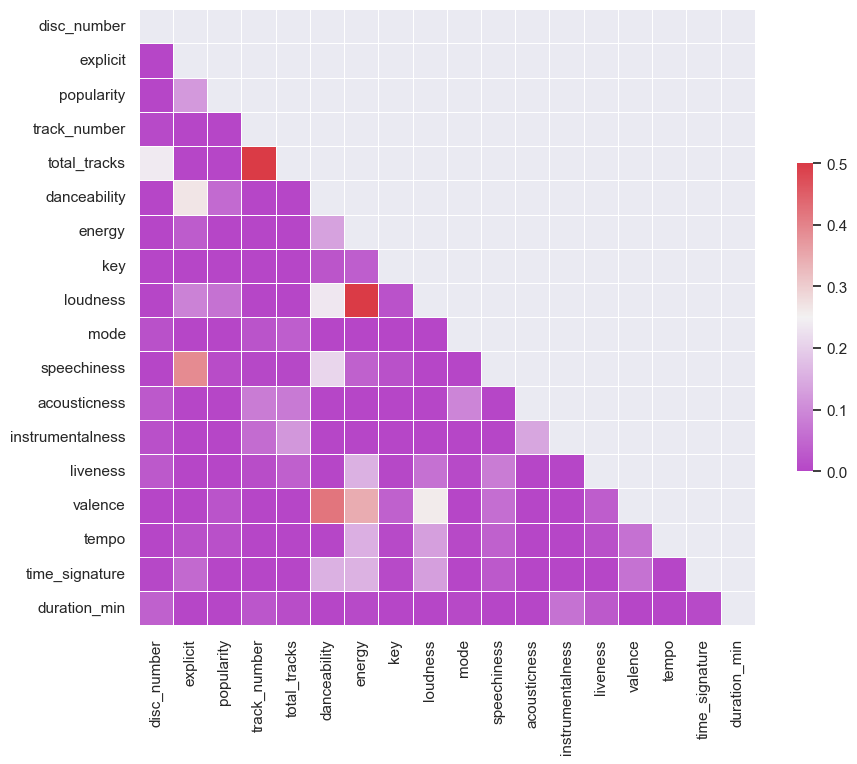

In [194]:

# mask upper triangle for redudant visualization
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# change the size of the figure with the classic 11, 8
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap graph, we can verify the correlation between some features are, for instance:

Major correlations: 

- Danceability and Valence 
- Energy and Valence 

Minor correlations:

- Danceability and Loudness
- Loudness and Tempo
- Loudness and Valence
- Danceability and Speachless

Checking correlation heatmap, we can determinate each correlation into the dataset.

### Scatterplot of Major Correlations

<AxesSubplot: xlabel='speechiness', ylabel='danceability'>

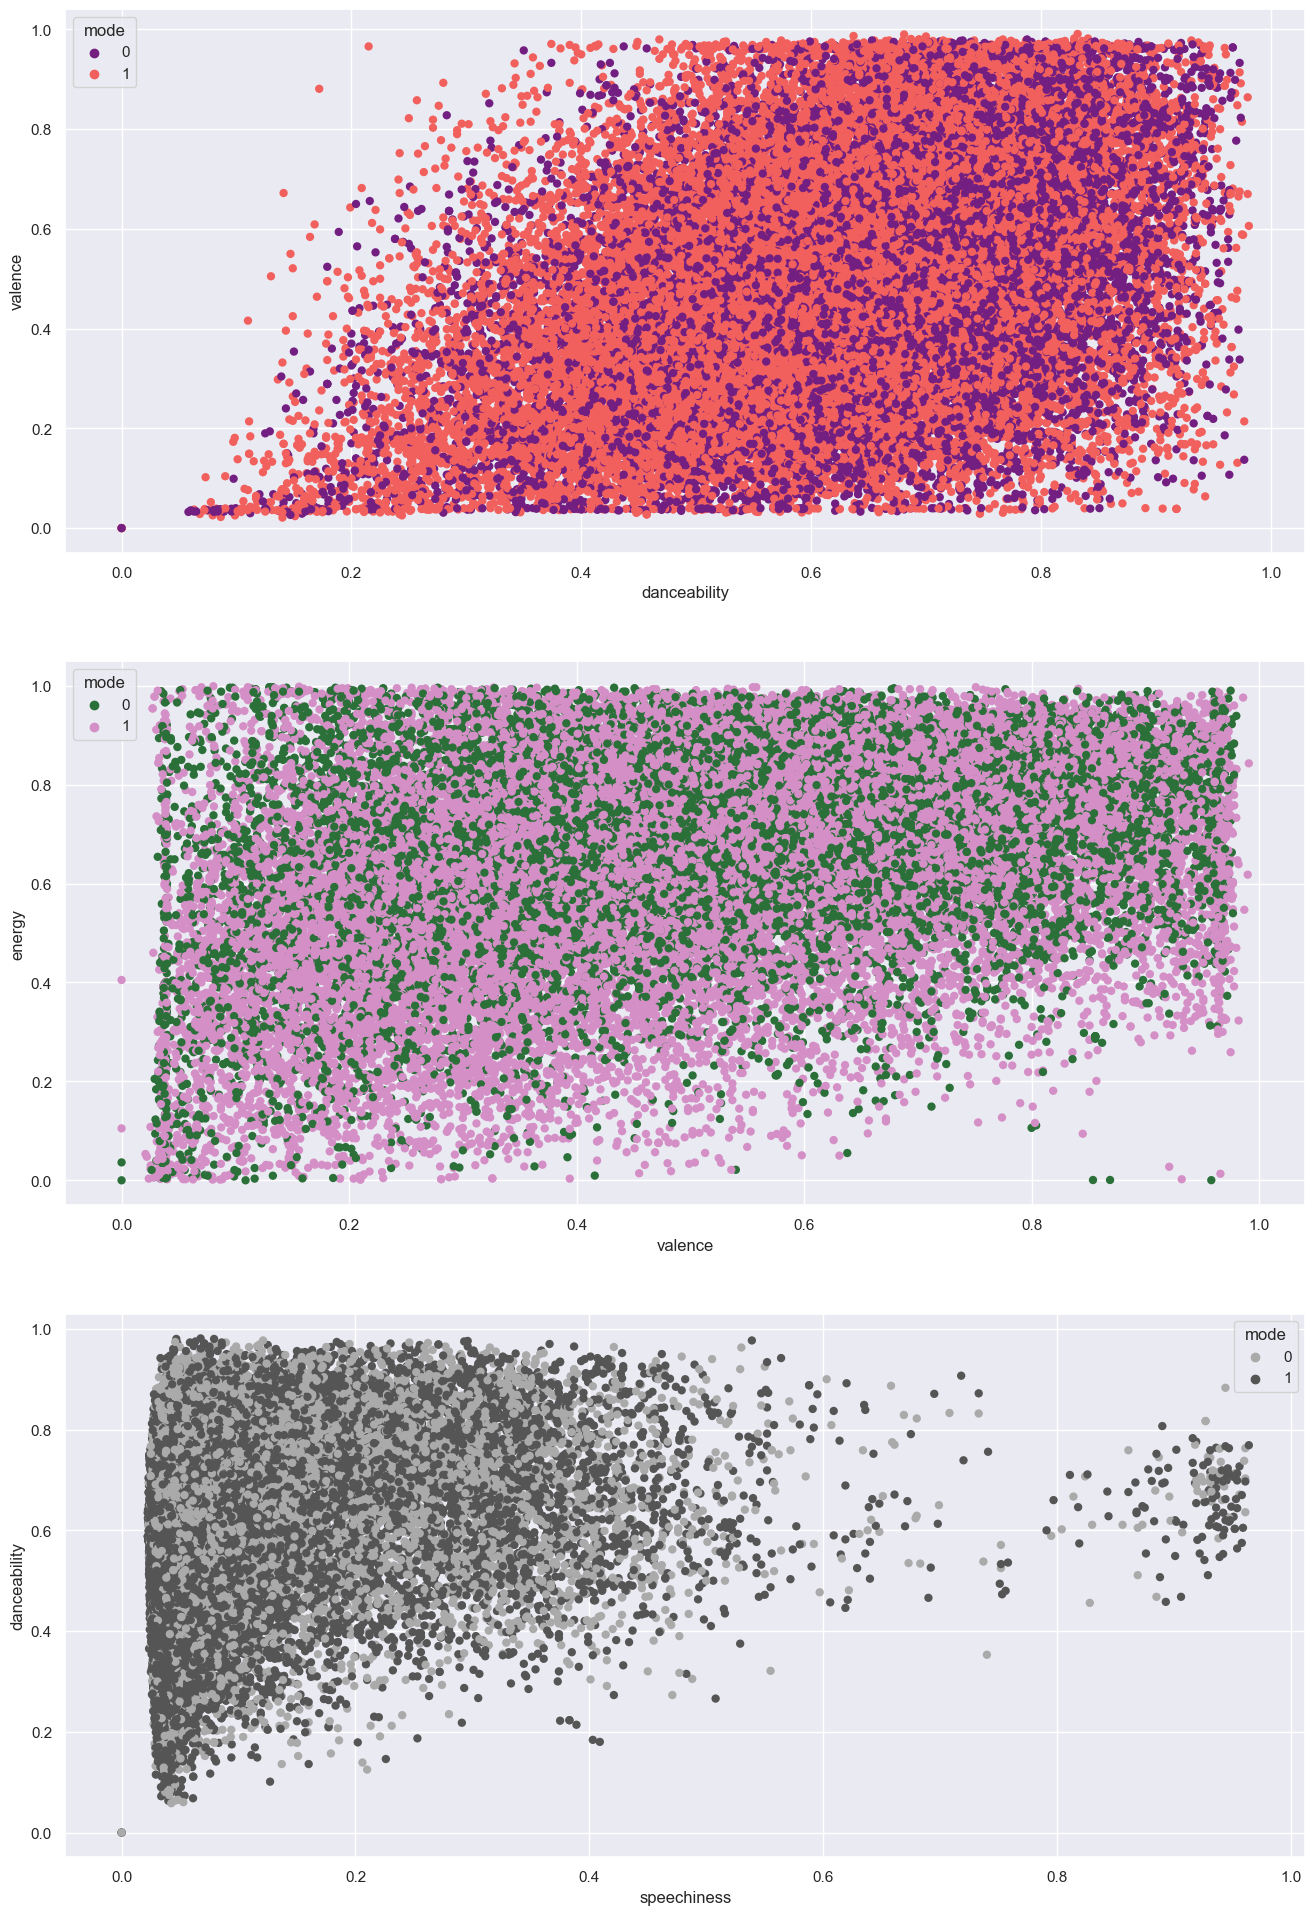

In [221]:
f, ax = plt.subplots(3, 1,  figsize=(16,24))

# adding also mode to get analysis as the major and minor

# Major correlations 

sns.scatterplot(x="danceability", y="valence",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax[0])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax[1])

sns.scatterplot(x="speechiness", y="danceability",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax[2])



### Pivot Tables on Popularity Feature

#### Popularity by Artists

In [271]:
# draw pivot table by artist
pivot_artist = pd.pivot_table(df, index=['artist_name'], values=['popularity'], aggfunc=np.mean)
pivot_artist.sort_values(by=['popularity'], ascending=False)

,popularity
artist_name,
SZA,80.853659
Bad Bunny,80.382979
Harry Styles,78.368421
Taylor Swift,77.840909
Drake,76.940000
...,...
Mambo Kingz,25.363636
Benjamin Blümchen,24.918367
Wolfgang Amadeus Mozart,22.255319


#### Popularity by Albums

In [270]:
pivot_album = pd.pivot_table(df, index=['album_name'], values=['popularity'], aggfunc=np.mean)
pivot_album.sort_values(by=['popularity'], ascending=False)

,popularity
album_name,
Unholy (feat. Kim Petras),100.0
La Bachata,98.0
"Quevedo: Bzrp Music Sessions, Vol. 52",97.0
"I Ain’t Worried (Music From The Motion Picture ""Top Gun: Maverick"")",95.0
Calm Down (with Selena Gomez),95.0
...,...
Coke Boys 6,0.0
The State of Soul Music,0.0
Aún quedan vacaciones,0.0


#### Popularity by Tracks

In [274]:
pivot_track = pd.pivot_table(df, index=['track_name'], values=['popularity'], aggfunc=np.mean)
pivot_track.sort_values(by=['popularity'], ascending=False)

,popularity
track_name,
"Quevedo: Bzrp Music Sessions, Vol. 52",97.0
Me Porto Bonito,96.0
Tití Me Preguntó,95.0
Calm Down (with Selena Gomez),95.0
I Wanna Be Yours,94.0
...,...
From A Twinkling Star To A Passing Angel - Demo Medley,0.0
Only Want You,0.0
The Tree,0.0
